In [1]:
import os
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

2025-04-22 19:47:27.932610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 1. Load GloVe Embedding
glove_dir = './model/Glove'
embeddings_index = {}
print("Loading GloVe model...")

with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors' %len(embeddings_index))
word = 'the'
embedding_vector = embeddings_index.get(word)
if embedding_vector is not None:
    print(f"Embedding vector for '{word}':")
    print(embedding_vector)
else:
    print(f"Word '{word}' not found in the GloVe model.")

Loading GloVe model...
Found 400000 word vectors
Embedding vector for 'the':
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0

In [3]:
#2 IMDB dataset load
max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

#3 Mapping IMDB Dataset word index to Glove Embedding
word_index = imdb.get_word_index()
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#4 Model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

history= model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 89s 421ms/step - accuracy: 0.4993 - loss: 0.6945 - val_accuracy: 0.5377 - val_loss: 0.6907
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 91s 467ms/step - accuracy: 0.5248 - loss: 0.6910 - val_accuracy: 0.5380 - val_loss: 0.6880
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.5603 - loss: 0.6840 - val_accuracy: 0.5970 - val_loss: 0.6669
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 73s 371ms/step - accuracy: 0.5963 - loss: 0.6696 - val_accuracy: 0.6122 - val_loss: 0.6568
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 377ms/step - accuracy: 0.6167 - loss: 0.6572 - val_accuracy: 0.6277 - val_loss: 0.6473
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 73s 373ms/step - accuracy: 0.6227 - loss: 0.6524 - val_accuracy: 0.6306 - val_loss: 0.6409
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 73s 373ms/step - accuracy: 0.6475 - loss: 0.6359 - val_accuracy: 0.6482 - val_loss: 0.6261
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 72s 368ms/step - accuracy: 0.6454 - loss: 0.6344 - val

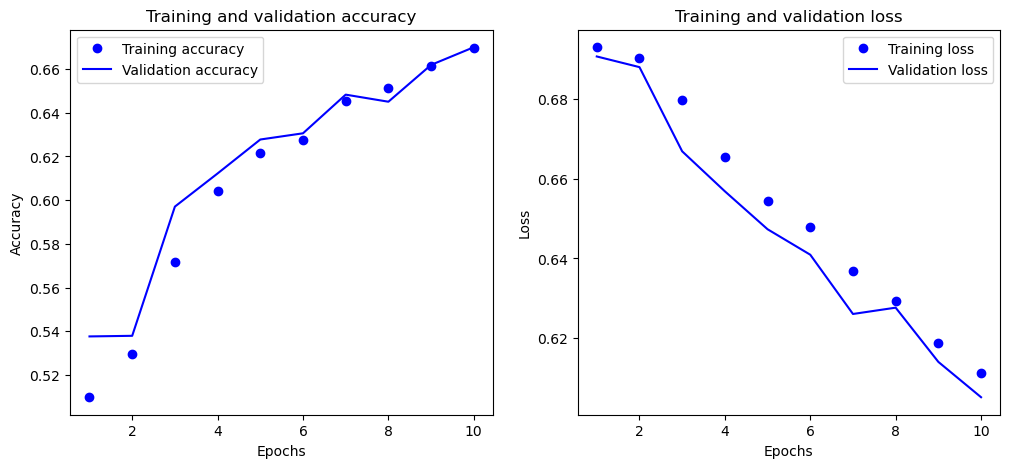

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

test_texts = [    
    "I hated this movie. It was terrible and the acting was horrible.",
    "This was the worst film I have ever seen. Not worth the time.",
    "I loved this movie. It was fantastic and the acting was great.",
    "This was the best film I have seen in a long time. Totally worth it.",
    "I had high hopes for this movie, but it was a complete letdown. The plot made no sense and the characters were flat.",
    "This film was a disaster from start to finish. The dialogue was awkward, and the pacing was painfully slow.",
    "What an amazing film! The plot was deeply engaging, and the cinematography was stunning from beginning to end.",
    "I was thoroughly impressed by this film. The direction, the music, and the performances all came together perfectly."
]

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test_texts)
sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(sequences, maxlen=maxlen)

predictions = model.predict(test_data)

for i, text in enumerate(test_texts):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")
    print(f"Prediction Score: {predictions[i][0]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Text: I hated this movie. It was terrible and the acting was horrible.
Predicted Sentiment: Positive
Prediction Score: 0.5822008848190308

Text: This was the worst film I have ever seen. Not worth the time.
Predicted Sentiment: Positive
Prediction Score: 0.5167372226715088

Text: I loved this movie. It was fantastic and the acting was great.
Predicted Sentiment: Positive
Prediction Score: 0.5465172529220581

Text: This was the best film I have seen in a long time. Totally worth it.
Predicted Sentiment: Positive
Prediction Score: 0.5487000942230225

Text: I had high hopes for this movie, but it was a complete letdown. The plot made no sense and the characters were flat.
Predicted Sentiment: Positive
Prediction Score: 0.652165949344635

Text: This film was a disaster from start to finish. The dialogue was awkward, and the pacing was painfully slow.
Predicted Sentiment: Positive
Prediction Score: 0.6638056635856628

Text: What an amazing film! The plo

Above doesn't fit the movie test cases correctly, as it is only trained for "public" words not the specificity of movie reviews.